# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

# Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

# Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
contract = pd.read_csv('contract.csv', index_col='customerID')
personal = pd.read_csv('personal.csv', index_col='customerID')
internet = pd.read_csv('internet.csv', index_col='customerID')
phone = pd.read_csv('phone.csv', index_col='customerID')

### Contract

In [3]:
contract.head()

BeginDate EndDate            Type PaperlessBilling  \
customerID                                                        
7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
5575-GNVDE  2017-04-01      No        One year               No   
3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
7795-CFOCW  2016-05-01      No        One year               No   
9237-HQITU  2019-09-01      No  Month-to-month              Yes   

                        PaymentMethod  MonthlyCharges TotalCharges  
customerID                                                          
7590-VHVEG           Electronic check           29.85        31.04  
5575-GNVDE               Mailed check           56.95      2071.84  
3668-QPYBK               Mailed check           53.85       226.17  
7795-CFOCW  Bank transfer (automatic)           42.30       1960.6  
9237-HQITU           Electronic check           70.70        353.5

In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


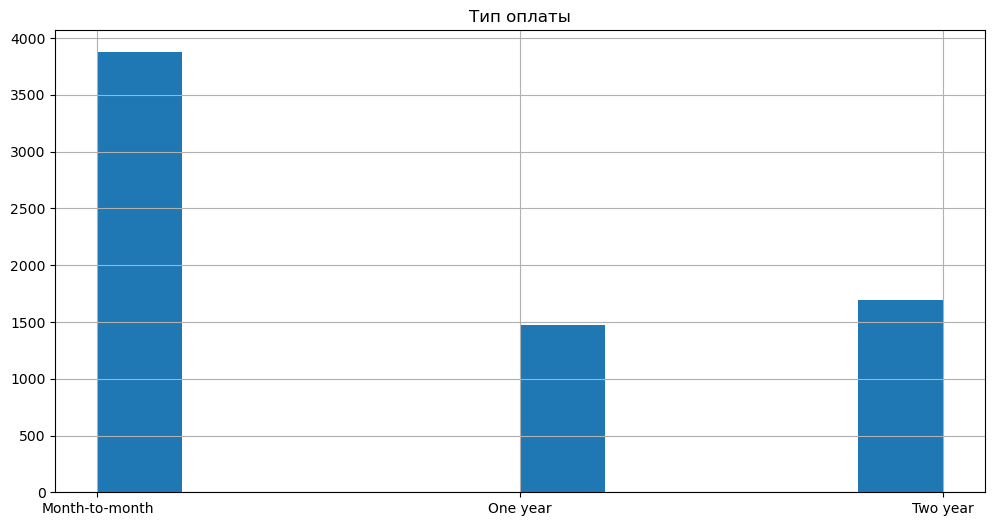

In [5]:
contract['Type'].hist(figsize=(12,6), bins=10)
plt.title('Тип оплаты');

На графике видно что, большинство клиентов выбирают платить каждый месяц, но также видно, что клиентов, которые оплачивают сразу на 2 года, больше, чем тех, которые оплачивают на год, возможно, это связанно с более лояльными условиями, предоставляемые тем кто оплачивает 2 года.

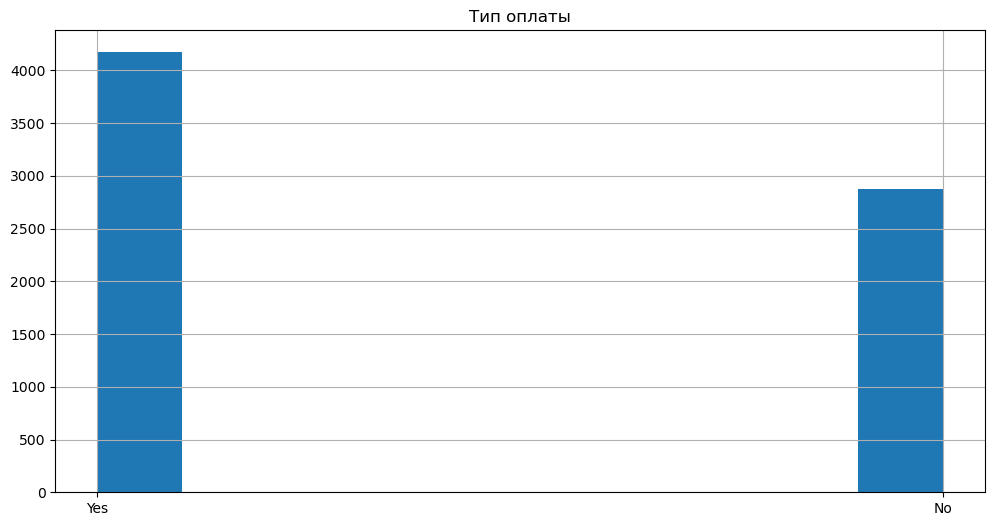

In [6]:
contract['PaperlessBilling'].hist(figsize=(12,6), bins=10)
plt.title('Тип оплаты');

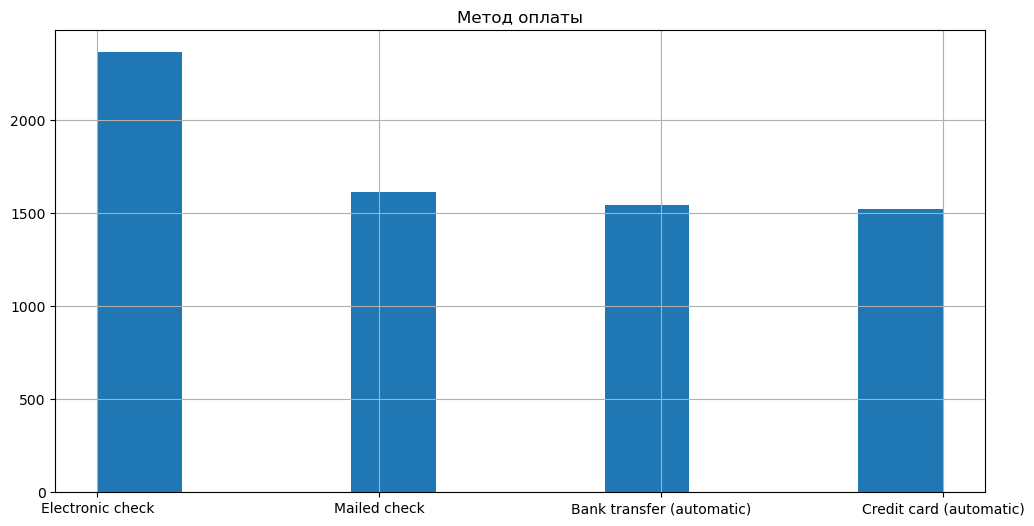

In [7]:
contract['PaymentMethod'].hist(figsize=(12,6), bins=10)
plt.title('Метод оплаты');

Чаще всего люди оплачивают электронно, что гораздно удобнее.

In [8]:
contract.pivot_table(index='Type', values='MonthlyCharges')

MonthlyCharges
Type                          
Month-to-month       66.398490
One year             65.048608
Two year             60.770413

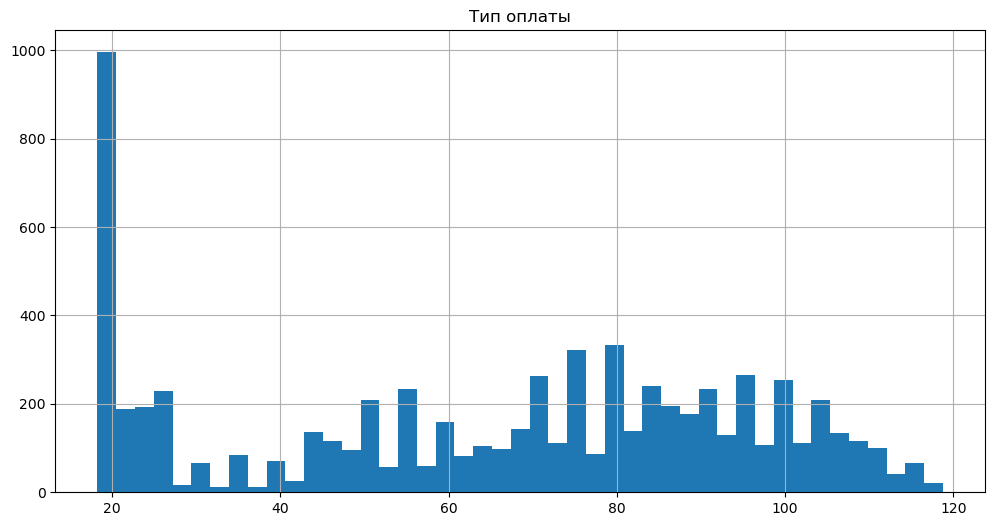

In [9]:
contract['MonthlyCharges'].hist(figsize=(12,6), bins=45)
plt.title('Тип оплаты');

Вывод по датасету: <br>
    1. Необходимо изменить тип данных на datetime у столбца BeginDate и EndDate<br>
    2. Исследовать пик у столбца MonthlyCharges

### Personal

In [10]:
personal.head()

gender  SeniorCitizen Partner Dependents
customerID                                          
7590-VHVEG  Female              0     Yes         No
5575-GNVDE    Male              0      No         No
3668-QPYBK    Male              0      No         No
7795-CFOCW    Male              0      No         No
9237-HQITU  Female              0      No         No

In [11]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


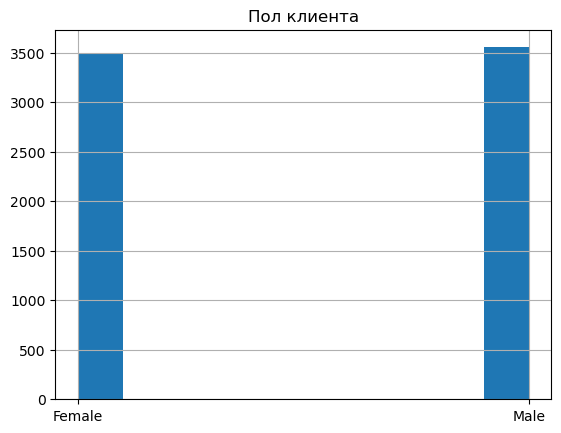

In [12]:
personal['gender'].hist()
plt.title('Пол клиента');

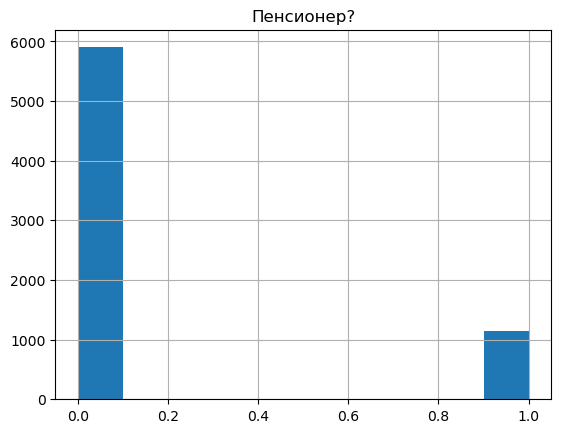

In [13]:
personal['SeniorCitizen'].hist()
plt.title('Пенсионер?');

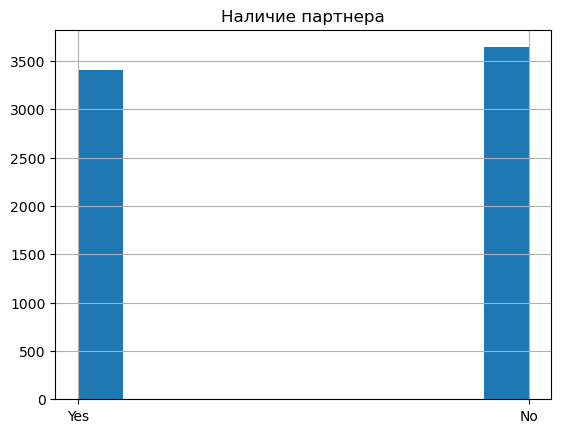

In [14]:
personal['Partner'].hist()
plt.title('Наличие партнера');

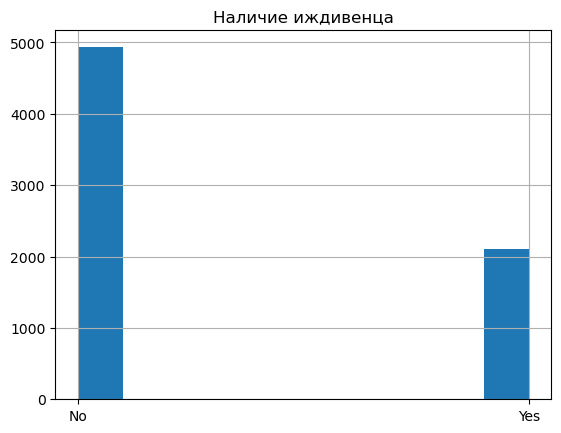

In [15]:
personal['Dependents'].hist()
plt.title('Наличие иждивенца');

Вывод: Достаточно не информативный датасет, но какую-то общую информацию о клиентах узнать удалось

### Internet

In [16]:
internet.head()

InternetService OnlineSecurity OnlineBackup DeviceProtection  \
customerID                                                                
7590-VHVEG             DSL             No          Yes               No   
5575-GNVDE             DSL            Yes           No              Yes   
3668-QPYBK             DSL            Yes          Yes               No   
7795-CFOCW             DSL            Yes           No              Yes   
9237-HQITU     Fiber optic             No           No               No   

           TechSupport StreamingTV StreamingMovies  
customerID                                          
7590-VHVEG          No          No              No  
5575-GNVDE          No          No              No  
3668-QPYBK          No          No              No  
7795-CFOCW         Yes          No              No  
9237-HQITU          No          No              No

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


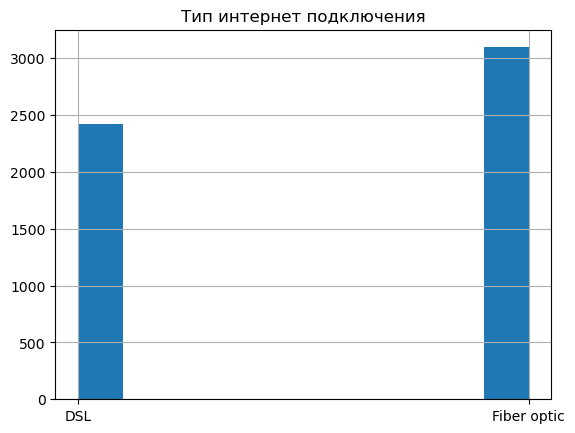

In [18]:
internet['InternetService'].hist()
plt.title('Тип интернет подключения');

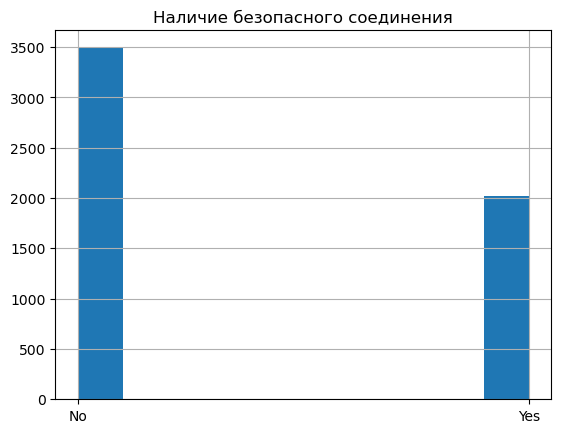

In [19]:
internet['OnlineSecurity'].hist()
plt.title('Наличие безопасного соединения');

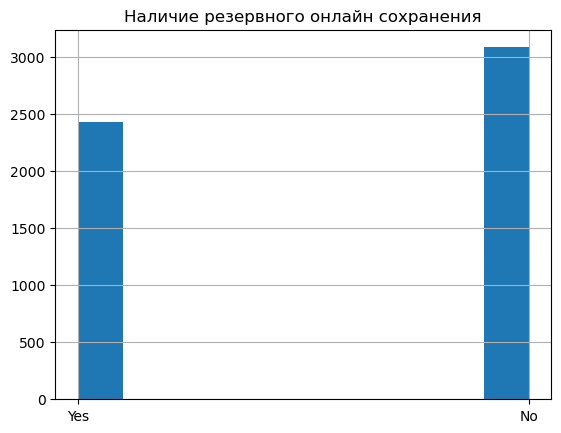

In [20]:
internet['OnlineBackup'].hist()
plt.title('Наличие резервного онлайн сохранения');

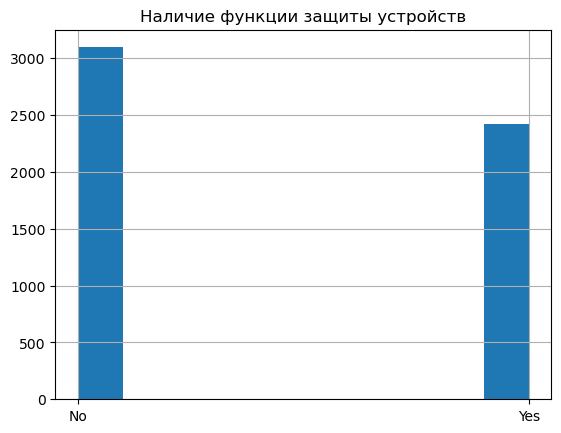

In [21]:
internet['DeviceProtection'].hist()
plt.title('Наличие функции защиты устройств');

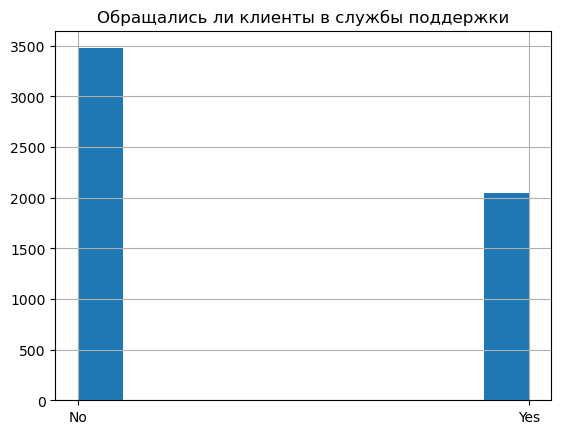

In [22]:
internet['TechSupport'].hist()
plt.title('Обращались ли клиенты в службы поддержки');

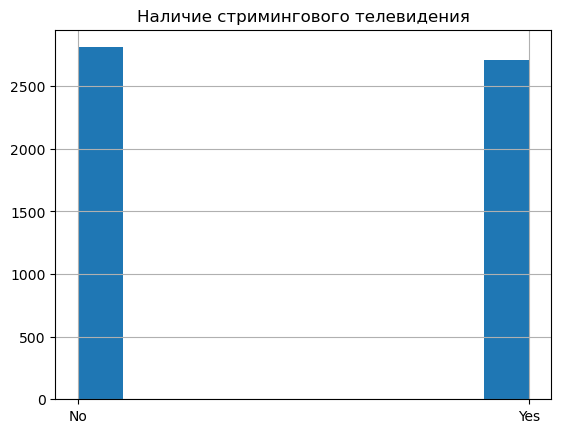

In [23]:
internet['StreamingTV'].hist()
plt.title('Наличие стримингового телевидения');

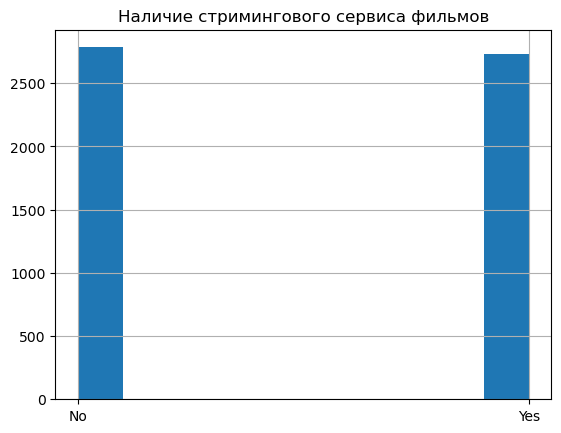

In [24]:
internet['StreamingMovies'].hist()
plt.title('Наличие стримингового сервиса фильмов');

Вывод: <br>
У большинства пользователей, подключен оптоволоконный кабель, DSL обладает меньшей скоростью и его ставят обычно там где нет возможности провести оптоволоконный кабель например в частных домах. <br>
<br>
Пользователи чаще отказываются от доп услуг, что логично.<br>
<br>
Но с стриминговыми сервисами дела обстоят немного по-другому: примерно поровну распределены, те кто подключают и не подключат телевидение и сервисы с фильмами.

### Phone

In [25]:
phone.head()

MultipleLines
customerID              
5575-GNVDE            No
3668-QPYBK            No
9237-HQITU            No
9305-CDSKC           Yes
1452-KIOVK           Yes

In [26]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


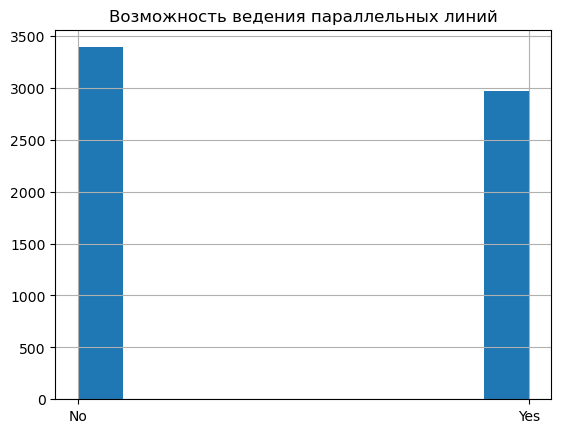

In [27]:
phone['MultipleLines'].hist()
plt.title('Возможность ведения параллельных линий');